In [1]:
import matplotlib.pyplot as plt
import torch

splits = []

test_losses_logmel = []
test_losses_scatter = []
val_losses_logmel = []
val_losses_scatter = []
val_f1_logmel = []
val_f1_scatter = []
epoch_logmel = []
epoch_scatter = []

for i in range(10):
    split = str((i+1)*10)
    checkpoint = torch.load('/home/laura/thesis/two_inputs/models/logmel_reduced/'+split+'/model_best.pth.tar')
    
    splits.append((i+1)/10)
    test_losses_logmel.append(checkpoint['test_loss'])
    val_losses_logmel.append(min(checkpoint['val_losses']))
    val_f1_logmel.append(checkpoint['macro_f1_val'])
    epoch_logmel.append(checkpoint['epoch'])

for i in range(10):
    split = str((i+1)*10)
    checkpoint = torch.load('/home/laura/thesis/two_inputs/models/9_8_132300_reduced/'+split+'/model_best.pth.tar')

    test_losses_scatter.append(checkpoint['test_loss'])
    if 'val_loss' in checkpoint.keys():
        val_losses_scatter.append(min(checkpoint['val_loss']))
    else:
        val_losses_scatter.append(min(checkpoint['val_losses']))
    val_f1_scatter.append(checkpoint['macro_f1_val'])
    epoch_scatter.append(checkpoint['epoch'])

In [2]:
print('things I saved: ', checkpoint.keys())

things I saved:  dict_keys(['epoch', 'state_dict', 'train_loss', 'val_loss', 'test_loss', 'f1_instr_test', 'macro_f1_val', 'split', 'optimizer'])


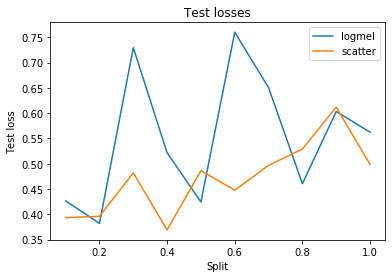

In [3]:
plt.title('Test losses')
plt.plot(splits, test_losses_logmel, label='logmel')
plt.plot(splits, test_losses_scatter, label='scatter')
plt.legend()
plt.ylabel('Test loss')
plt.xlabel('Split')
plt.show()

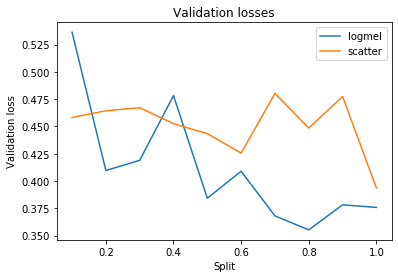

In [4]:
plt.title('Validation losses')
plt.plot(splits, val_losses_logmel, label='logmel')
plt.plot(splits, val_losses_scatter, label='scatter')
plt.legend()
plt.ylabel('Validation loss')
plt.xlabel('Split')
plt.show()

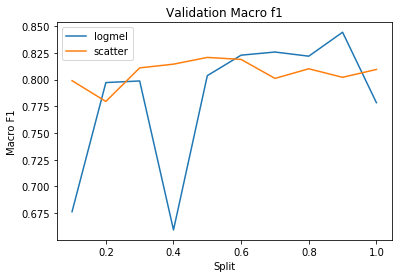

In [5]:
plt.title('Validation Macro f1')
plt.plot(splits, val_f1_logmel, label='logmel')
plt.plot(splits, val_f1_scatter, label='scatter')
plt.legend()
plt.ylabel('Macro F1')
plt.xlabel('Split')
plt.show()

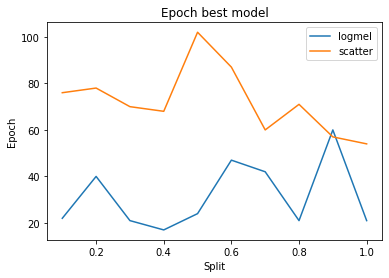

In [6]:
plt.title('Epoch best model')
plt.plot(splits, epoch_logmel, label='logmel')
plt.plot(splits, epoch_scatter, label='scatter')
plt.legend()
plt.ylabel('Epoch')
plt.xlabel('Split')
plt.show()